### SVM原理与可视化

In [ ]:
# 超平面，怎么找到的

#### 导包

In [1]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### 创建数据

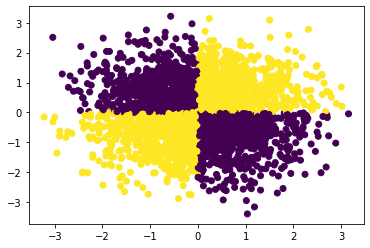

In [16]:
X = np.random.randn(3000,2) # 训练数据

y = [1 if i > 0 else 0 for i in X[:,0] * X[:,1]]

plt.scatter(X[:,0],X[:,1],c = y)

#### 建模学习

In [56]:
svc = SVC(kernel='poly',degree=2)# 高斯核函数，数据变换，变形，升维
svc.fit(X,y)
svc.score(X,y)

0.9943333333333333

#### 创建预测数据

In [57]:
a = [2,3,5]
b = [1,4,7,9]

print(a,b)

[2, 3, 5] [1, 4, 7, 9]


[[2 3 5]
 [2 3 5]
 [2 3 5]
 [2 3 5]]
---------
[[1 1 1]
 [4 4 4]
 [7 7 7]
 [9 9 9]]


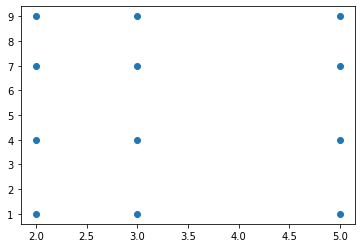

In [58]:
A,B = np.meshgrid(a,b)
print(A)
print('---------')
print(B)
plt.scatter(A,B)

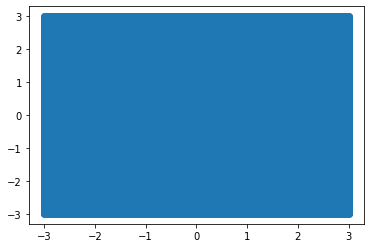

In [59]:
f1 = np.linspace(-3,3,200)
f2 = np.linspace(-3,3,180)

F1,F2 = np.meshgrid(f1,f2) # 网格交叉
X_test = np.column_stack([F1.ravel(),F2.reshape(-1)])

plt.scatter(X_test[:,0],X_test[:,1])

#### 算法预测

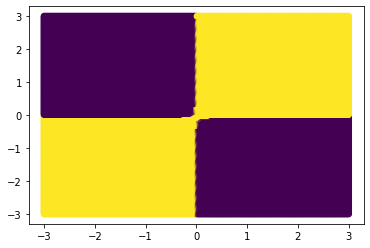

In [60]:
# 算法给我们的预测的类别
y_pred = svc.predict(X_test)

plt.scatter(X_test[:,0],X_test[:,1],c = y_pred)

#### 算法原理可视化【超平面】

In [61]:
d = svc.decision_function(X_test)
d

array([102.28708056, 101.26529785, 100.24339038, ..., 100.24339038,
       101.26529785, 102.28708056])

In [62]:
d.min()

-103.5053953169917

#### 绘制轮廓线

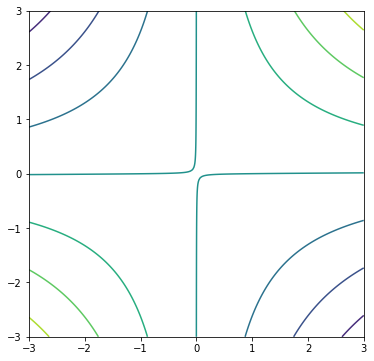

In [63]:
plt.figure(figsize=(6,6))
plt.contour(F1,F2,d.reshape(180,200))# 等高线

#### 轮廓面

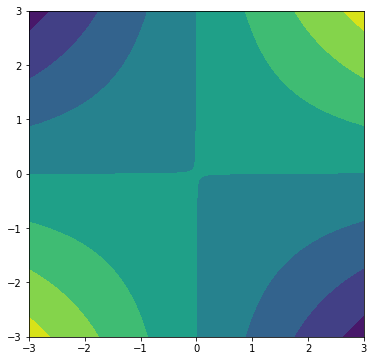

In [64]:
plt.figure(figsize=(6,6))
plt.contourf(F1,F2,d.reshape(180,200))

#### 3D显示距离

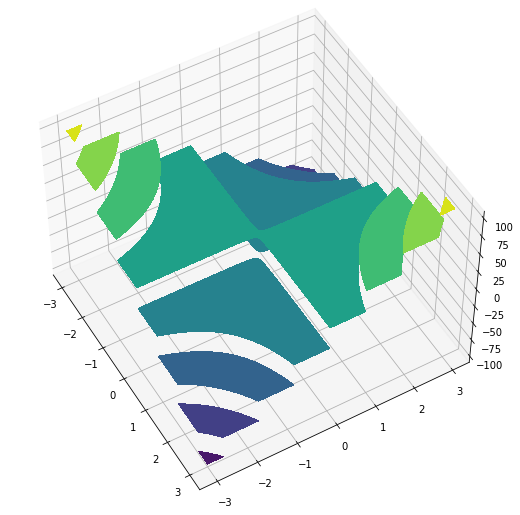

In [66]:
plt.figure(figsize=(12,9))
ax = plt.subplot(111,projection = '3d')

ax.contourf(F1,F2,d.reshape(-1,200))
ax.view_init(50,-30)